In [14]:
import json
import numpy
import random
import requests
import pandas as pd
from configg import gkey
from configo import okey
from pprint import pprint
from citipy import citipy
import matplotlib.pyplot as plt
from scipy.stats import linregress

#!pip install citipy



In [15]:
#Requirement I: Using Citypy library, create list of 500 cities you can visualize weather patterns for. 

#Task A: Create list of 500+ of geographic coordinates to cross-reference against CitiPy Library for city list

#Sub-Task 1: Create list of latitudes
randomlat = []
for i in range(0,10):
    n = random.randint(-90,90)
    randomlat.append(n)
#print(randomlat)

#Sub-Task #2: Create list of longitudes
randomlon = []
for i in range(0,10):
    n = random.randint(-180,180)
    randomlon.append(n)
#print(randomlon)

#Sub-Task #3: Create list of latitude-longitude pairs from individual lists
pairs =[[a,b] for a in randomlat
       for b in randomlon if a!= b]
#print(pairs)

#Sub-Task #4: Loop CitiPy Library to match coordinate pairs with city names, and create a list of city names 
cities = []
for geo_coord in pairs:
    lat, lon = geo_coord
    cities.append(citipy.nearest_city(lat, lon))

#Sub-Task #5: Store lists of city names and country codes
country_code = []
city_names = []

for city in cities:
    country_code.append(city.country_code)
    city_names.append(city.city_name)
#print(city_names)

#Sub-Task 6: Export list of cities as csv
city_df = pd.DataFrame(city_names)
city_df.to_csv("cities.csv", index=False, header=True)

pairs_df = pd.DataFrame(pairs)
pairs_df.to_csv("pairs.csv", index=False, header=True)

In [16]:
#Task B: Given city list, obtain directed weather information from OpenWeather API

#Sub-Task #1: Construct Query URL
url = "http://api.openweathermap.org/data/2.5/weather?"
query_url = f"{url}appid={okey}&q="

#Sub-Task #2: 
lat = []
temp = []
hum = []
cloud = []
wind = []

#temp working code
city_names1 = ['Paris','Cape Town', 'New York', 'Sydney', 'Moscow', 'Auckland','New Delhi','Buenos Aires']

for city in city_names1:
    response = requests.get(query_url + city).json()
    lat.append(response['coord']['lat'])
    temp.append(response['main']['temp'])
    hum.append(response['main']['humidity'])
    cloud.append(response['clouds']['all'])
    wind.append(response['wind']['speed'])

print(f"Lat info is: {lat}")
print(f"Temp info is: {temp}")
print(f"Humidity info is: {hum}")
print(f"Cloudiness info is: {cloud}")
print(f"Wind Speed info is: {wind}")

Lat info is: [48.85, -33.93, 40.71, -33.87, 55.75, -36.87, 28.61, -34.61]
Temp info is: [294.2, 283.94, 307.63, 281.24, 290.12, 286.18, 300.5, 292.1]
Humidity info is: [35, 93, 46, 66, 93, 100, 100, 72]
Cloudiness info is: [14, 0, 20, 0, 100, 4, 90, 100]
Wind Speed info is: [4.6, 1, 5.7, 6.2, 2, 3.1, 5.1, 2.6]


In [17]:
#Task C: Given weather data for city list, create dataframe of all requested weather data

weather_df = {"city": city_names1, 
              "Lat (deg)": lat, 
              "Temp (K)": temp, 
              "Humidity %": hum, 
              "Cloudiness %": cloud, 
              "Wind Speed (mph)": wind}

weather_data = pd.DataFrame(weather_df)
weather_data.to_csv("weather_data.csv", index=False, header=True)
weather_data

,city,Lat (deg),Temp (K),Humidity %,Cloudiness %,Wind Speed (mph)
0,Paris,48.85,294.20,35,14,4.6
1,Cape Town,-33.93,283.94,93,0,1.0
2,New York,40.71,307.63,46,20,5.7
3,Sydney,-33.87,281.24,66,0,6.2
4,Moscow,55.75,290.12,93,100,2.0
5,Auckland,-36.87,286.18,100,4,3.1
6,New Delhi,28.61,300.50,100,90,5.1
7,Buenos Aires,-34.61,292.10,72,100,2.6


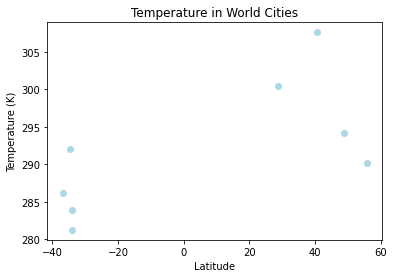

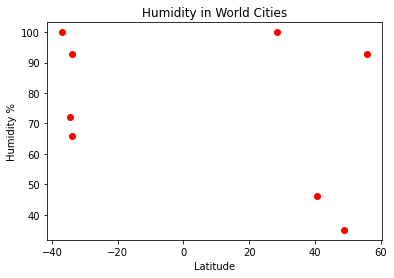

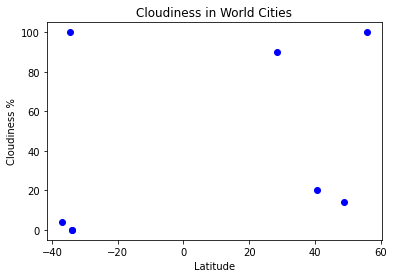

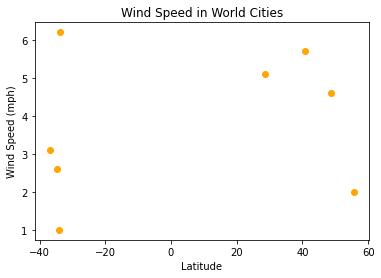

In [18]:
#Task D: Given weather dataframe, construct requested plots with explanations of trends

#Sub-Task #1: Temperature vs. Latitude
plt.scatter(weather_data["Lat (deg)"],weather_data["Temp (K)"], color="lightblue")
plt.title("Temperature in World Cities")
plt.ylabel("Temperature (K)")
plt.xlabel("Latitude")
plt.show()

#Temperature vs. Latitude Observations:

#Sub-Task #2: Humidity vs. Latitude
plt.scatter(weather_data["Lat (deg)"],weather_data["Humidity %"], color="red")
plt.title("Humidity in World Cities")
plt.ylabel("Humidity %")
plt.xlabel("Latitude")
plt.show()

#Humidity vs. Latitude Observations:

#Sub-Task #3: Cloudiness vs. Latitude
plt.scatter(weather_data["Lat (deg)"],weather_data["Cloudiness %"], color="blue")
plt.title("Cloudiness in World Cities")
plt.ylabel("Cloudiness %")
plt.xlabel("Latitude")
plt.show()

#Cloudiness vs. Latitude Observations:

#Sub-Task #4: Wind Speed vs. Latitude
plt.scatter(weather_data["Lat (deg)"],weather_data["Wind Speed (mph)"], color="orange")
plt.title("Wind Speed in World Cities")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.show()

#Wind Speed vs. Latitude Observations:

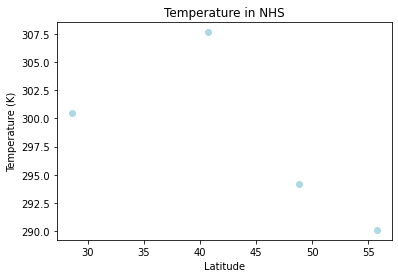

The r-squared is: 0.45712091344553535
y =-0.44x + 317.39


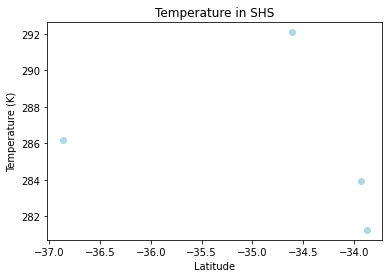

The r-squared is: 0.0778407222077827
y =-0.92x + 253.96


In [19]:
#Task E: Split the weather dataset by NHS/SHS Cities, then chart and do linear regression on Temperature vs. Latitude 

#NHS
nhs_weather_data = weather_data.loc[weather_data["Lat (deg)"] > 0]

x_values = nhs_weather_data['Lat (deg)']
y_values = nhs_weather_data['Temp (K)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y =" + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(nhs_weather_data["Lat (deg)"],nhs_weather_data["Temp (K)"], color="lightblue")
plt.title("Temperature in NHS")
plt.ylabel("Temperature (K)")
plt.xlabel("Latitude")
plt.show()
print(f"The r-squared is: {rvalue**2}")
print(line_eq)

#SHS
shs_weather_data = weather_data.loc[weather_data["Lat (deg)"] < 0]

x_values = shs_weather_data['Lat (deg)']
y_values = shs_weather_data['Temp (K)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y =" + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(shs_weather_data["Lat (deg)"],shs_weather_data["Temp (K)"], color="lightblue")
plt.title("Temperature in SHS")
plt.ylabel("Temperature (K)")
plt.xlabel("Latitude")
plt.show() 
print(f"The r-squared is: {rvalue**2}")
print(line_eq)

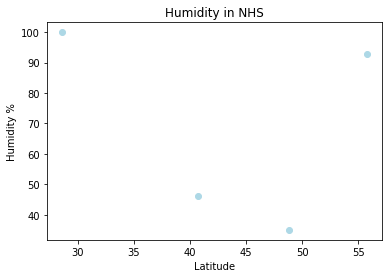

The r-squared is: 0.06193614519625168
y =-0.7x + 98.9


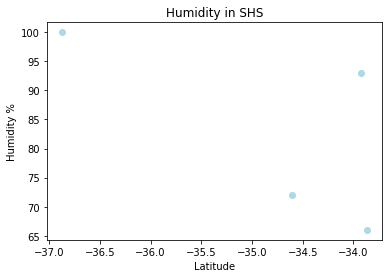

The r-squared is: 0.4156009224252659
y =-7.47x + -177.53


In [20]:
#Task F: Split the weather dataset by NHS/SHS Cities, then chart and do linear regression on Humidity vs. Latitude

#NHS
nhs_weather_data = weather_data.loc[weather_data["Lat (deg)"] > 0]

x_values = nhs_weather_data['Lat (deg)']
y_values = nhs_weather_data['Humidity %']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y =" + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(nhs_weather_data["Lat (deg)"],nhs_weather_data["Humidity %"], color="lightblue")
plt.title("Humidity in NHS")
plt.ylabel("Humidity %")
plt.xlabel("Latitude")
plt.show()
print(f"The r-squared is: {rvalue**2}")
print(line_eq)

#SHS
shs_weather_data = weather_data.loc[weather_data["Lat (deg)"] < 0]

x_values = shs_weather_data['Lat (deg)']
y_values = shs_weather_data['Humidity %']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y =" + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(shs_weather_data["Lat (deg)"],shs_weather_data["Humidity %"], color="lightblue")
plt.title("Humidity in SHS")
plt.ylabel("Humidity %")
plt.xlabel("Latitude")
plt.show()
print(f"The r-squared is: {rvalue**2}")
print(line_eq)

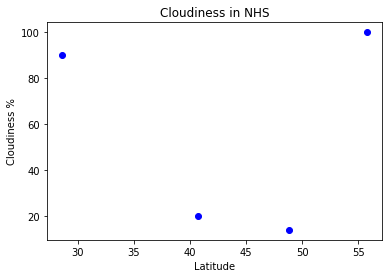

The r-squared is: 0.0033355265382357486
y =-0.22x + 65.75


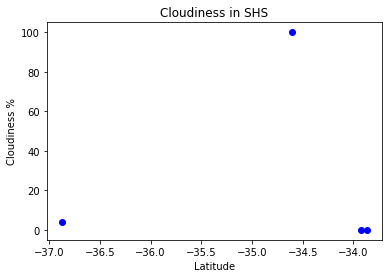

The r-squared is: 0.0037714606793549307
y =2.15x + 101.02


In [21]:
#Task G: Split the weather dataset by NHS/SHS Cities, then chart and do linear regression on Cloudiness vs. Latitude

#NHS
nhs_weather_data = weather_data.loc[weather_data["Lat (deg)"] > 0]

x_values = nhs_weather_data['Lat (deg)']
y_values = nhs_weather_data['Cloudiness %']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y =" + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(nhs_weather_data["Lat (deg)"],nhs_weather_data["Cloudiness %"], color="blue")
plt.title("Cloudiness in NHS")
plt.ylabel("Cloudiness %")
plt.xlabel("Latitude")
plt.show()
print(f"The r-squared is: {rvalue**2}")
print(line_eq)

#SHS
shs_weather_data = weather_data.loc[weather_data["Lat (deg)"] < 0]

x_values = shs_weather_data['Lat (deg)']
y_values = shs_weather_data['Cloudiness %']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y =" + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(shs_weather_data["Lat (deg)"],shs_weather_data["Cloudiness %"], color="blue")
plt.title("Cloudiness in SHS")
plt.ylabel("Cloudiness %")
plt.xlabel("Latitude")
plt.show()
print(f"The r-squared is: {rvalue**2}")
print(line_eq)

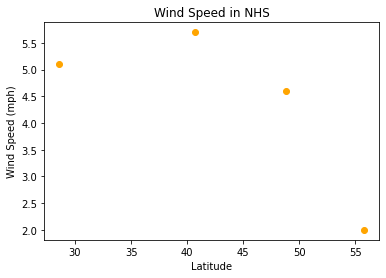

The r-squared is: 0.5521972821438151
y =-0.1x + 8.86


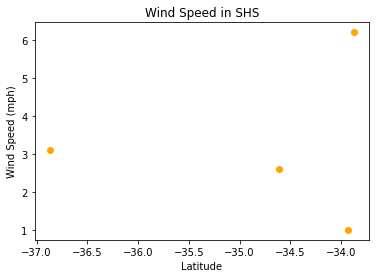

The r-squared is: 0.01116983152591464
y =0.16x + 8.92


In [22]:
#Task H: Split the weather dataset by NHS/SHS Cities, then chart and do linear regression on Wind Speed vs. Latitude

#NHS
nhs_weather_data = weather_data.loc[weather_data["Lat (deg)"] > 0]

x_values = nhs_weather_data['Lat (deg)']
y_values = nhs_weather_data['Wind Speed (mph)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y =" + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(nhs_weather_data["Lat (deg)"],nhs_weather_data["Wind Speed (mph)"], color="orange")
plt.title("Wind Speed in NHS")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.show()
print(f"The r-squared is: {rvalue**2}")
print(line_eq)

#SHS
shs_weather_data = weather_data.loc[weather_data["Lat (deg)"] < 0]

x_values = shs_weather_data['Lat (deg)']
y_values = shs_weather_data['Wind Speed (mph)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y =" + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(shs_weather_data["Lat (deg)"],shs_weather_data["Wind Speed (mph)"], color="orange")
plt.title("Wind Speed in SHS")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.show()
print(f"The r-squared is: {rvalue**2}")
print(line_eq)

In [23]:
#Things to Rectify:

    ##Why does city_names not append properly? (Using dummy data now)
    #Why does linear regression not show line (maybe related to above)?
    #How to ensure city_names does not contain duplicates?
    #How to correct temperature to F?
 